# WITH PANDAS AND MATPLOTLIB

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

INSTRUCTIONS

1. Number of people by gender
1. Kill weapon
1. Age of killed people
1. Race of killed people
1. Killed People According to Races (Pie Chart)
1. Most common 15 Name or Surname of killed people

<br>

read data

In [2]:
kill = pd.read_csv('PoliceKillingsUS.csv', encoding="windows-1252")

## 1: Plot number of people by gender

In [3]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [10]:
a=kill.groupby("gender").count()
a

,id,name,date,manner_of_death,armed,age,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
gender,,,,,,,,,,,,,
F,107,107,107,107,107,104,98,107,107,107,107,104,107
M,2428,2428,2428,2428,2419,2354,2242,2428,2428,2428,2428,2366,2428


In [5]:
kill['gender'].value_counts()

M    2428
F     107
Name: gender, dtype: int64

In [6]:
kill['gender'].value_counts().index

Index(['M', 'F'], dtype='object')

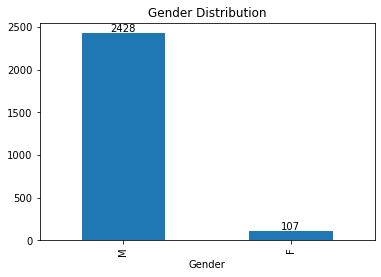

In [12]:
# with pandas

fig, ax = plt.subplots()


ax=kill["gender"].value_counts().plot.bar() 
ax.set_title("Gender Distribution")
ax.set_xlabel("Gender")
ax.bar_label(ax.containers[0],label_type="edge") ;



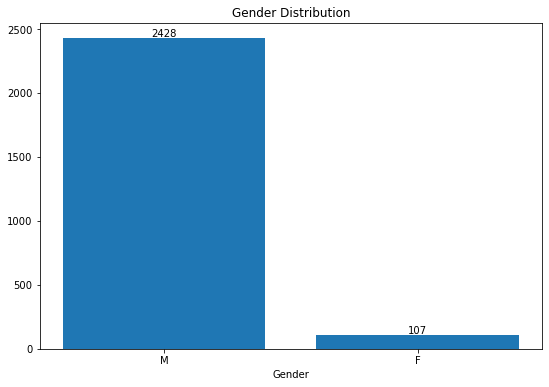

In [7]:
# with matplotlib

a=kill.gender.value_counts().index
b=kill['gender'].value_counts()

fig, ax = plt.subplots(figsize=(9,6))
ax.bar(a,b)
ax.set_title("Gender Distribution")
ax.set_xlabel("Gender")
ax.bar_label(ax.containers[0],label_type="edge") ;

## 2: Plot 7 most common kill weapons

In [13]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [16]:
common_weapons = kill['armed'].value_counts()[:7]
common_weapons

gun             1398
knife            373
vehicle          177
unarmed          171
undetermined     117
toy weapon       104
machete           18
Name: armed, dtype: int64

In [19]:
c=common_weapons.index
d=common_weapons.values
c,d

(Index(['gun', 'knife', 'vehicle', 'unarmed', 'undetermined', 'toy weapon',
        'machete'],
       dtype='object'),
 array([1398,  373,  177,  171,  117,  104,   18], dtype=int64))

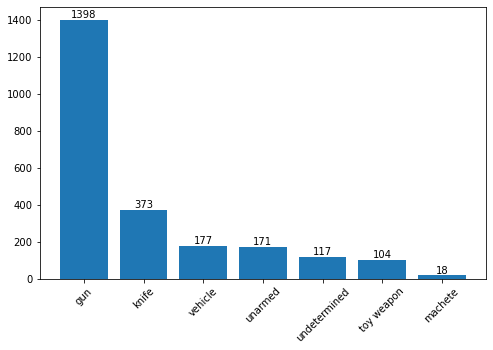

In [43]:
# with matplotlib

fig, ax = plt.subplots(figsize=(8,5))
ax.bar(c,d)
ax.set_xticklabels(c, rotation=45)
ax.bar_label(ax.containers[0],label_type="edge") ;



## 3: Plot number of age of killed people under three groups : Under 25 and Above 25, others

In [45]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [48]:
kill["age_cat"] = kill.age.apply(lambda x : "above25" if x > 25 else "below25")

In [49]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,age_cat
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,above25
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,above25
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,below25
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,above25
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,above25


In [50]:
age_class = kill.age_cat.value_counts()
age_class

above25    1905
below25     630
Name: age_cat, dtype: int64

In [51]:
e=age_class.index
e

Index(['above25', 'below25'], dtype='object')

[Text(0, 0, '1905'), Text(0, 0, '630')]

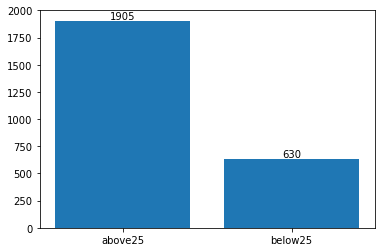

In [17]:
# with matplotlib
fig, ax = plt.subplots()
ax.bar(e, age_class)
ax.bar_label(ax.containers[0],label_type="edge") 


In [53]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,age_cat
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,above25
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,above25
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,below25
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,above25
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,above25


## 4: Plot number of killed poeple by race

In [52]:
race_freq = kill.race.value_counts()
race_freq

W    1201
B     618
H     423
A      39
N      31
O      28
Name: race, dtype: int64

In [56]:
f=race_freq.index
f

Index(['W', 'B', 'H', 'A', 'N', 'O'], dtype='object')

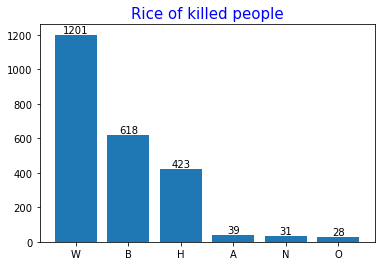

In [58]:
# with matplotlib
fig, ax = plt.subplots()
ax.bar(f,race_freq)
ax.set_title("Rice of killed people" ,color="blue",fontsize=15)
ax.bar_label(ax.containers[0],label_type="edge") ;



## 5: Killed People According to Races (Pie Chart)

In [59]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,age_cat
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,above25
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,above25
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,below25
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,above25
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,above25


In [22]:
kill.race.unique()

array(['A', 'W', 'H', 'B', 'O', nan, 'N'], dtype=object)

In [60]:
kill.gender.unique()

array(['M', 'F'], dtype=object)

In [61]:
kill.race.value_counts(dropna=False)

W      1201
B       618
H       423
NaN     195
A        39
N        31
O        28
Name: race, dtype: int64

Problem: missing value on race column.

**INSTRUCTION-1: Drop the all raws that contain missing value (dropna)**

In [64]:
kill.dropna(inplace=True)

In [66]:
kill.shape

(2254, 15)

**INSTRUCTION-2: Demonstrate Race Ratio of Killed People by a Pie Chart (You can use Matplotlib)**

In [67]:
kill.race.value_counts(dropna=False)

W    1168
B     592
H     401
A      36
N      29
O      28
Name: race, dtype: int64

In [69]:
labels=kill.race.value_counts().index
labels
#np.array(kill["race"].value_counts().index)

Index(['W', 'B', 'H', 'A', 'N', 'O'], dtype='object')

In [70]:
sizes=kill.race.value_counts().values
sizes

array([1168,  592,  401,   36,   29,   28], dtype=int64)

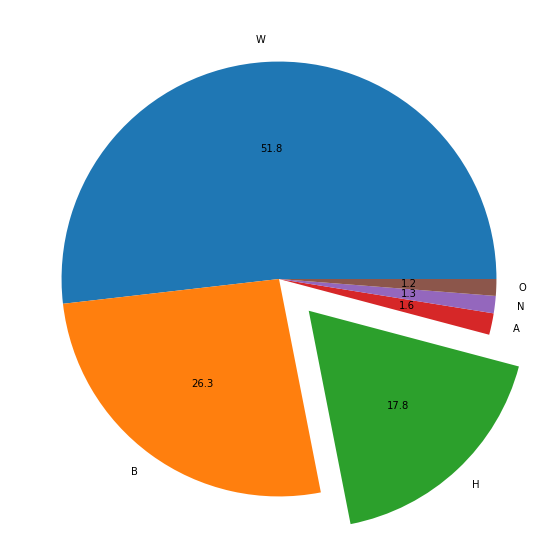

In [72]:
myexplode = [0, 0, 0.2, 0,0,0]
plt.figure(figsize = (12,10))
plt.pie(sizes, labels=labels  , explode=myexplode, autopct="%.1f") ;